# Trabalho de IA - Modelo de Regressão Linear

## Componentes do Grupo:

*   Augusto Emerson
*   Chrislley Machado
*   Lucas Eleutério
*   Luis Trindade
*   Nattan Lobato

*Nome do Dataset: kc_house_data*

# Importando as bibliotecas

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Carregando o dataset para um Dataframe (Pandas)

In [2]:
!wget https://raw.githubusercontent.com/aejunior/bsi-ia/master/dataset.csv -O dataset.csv

--2023-08-29 02:43:20--  https://raw.githubusercontent.com/aejunior/bsi-ia/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   2.40M  5.56MB/s    in 0.4s    

2023-08-29 02:43:20 (5.56 MB/s) - ‘dataset.csv’ saved [2515206/2515206]



In [3]:
df = pd.read_csv("dataset.csv")

df = df.dropna() # elimina as linhas com valores nulos (NaN)
# df = df.loc[~(df == 0).any(axis=1)] # elimina as linhas em que houver ao menor um valor igual a ZERO

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exibe o resumo do Dataset

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Selecionar apenas as DUAS features (colunas) que você irá correlacionar.

In [7]:
feature1 =  df[['sqft_living']] # Variável independente
feature2 = df[['price']] # Variável dependente

In [8]:
feature1.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [9]:
feature2.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


# Dividir o dataset em dados de treinamento e dados de teste
Neste caso vamos usar o train_test_split do scikitlearn

**ATENÇÃO**: Como requisito para o trabalho, você deve dividir o dataset em três momentos e obter a métrica de desempenho para cada vez.

*   1º momento, para test_size = 0.2
*   2º momento, para test_size = 0.3
*   3º momento, para test_size = 0.4


In [10]:
feature1_treino, feature1_test, feature2_treino, feature2_teste = train_test_split(feature1, feature2, test_size=0.4, random_state=42)

# Exibir a correlação entre as features do dataset de treinamento (**antes do treinamento**)

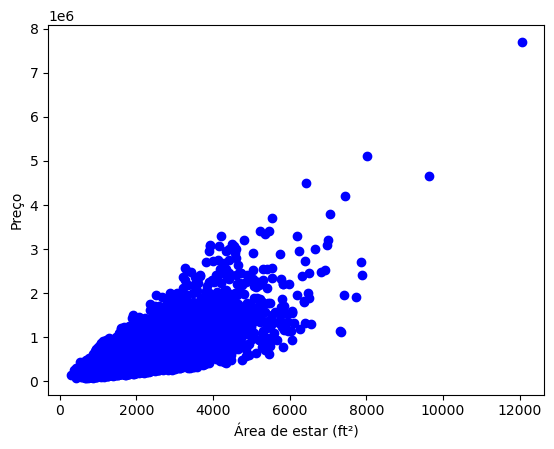

In [11]:
plt.scatter(feature1_treino, feature2_treino, color='blue')
plt.xlabel("Área de estar (ft²)") # legenda para a feature de treino 1
plt.ylabel("Preço") # legenda para a feature de treino 2
plt.show()

# Vamos treinar o modelo de regressão linear

In [12]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TREINO
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(feature1_treino, feature2_treino)


LinearRegression()

# Exibir os coeficientes (A e B)

In [13]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [-29687.20490389]
(B) Inclinação:  [[273.3220643]]


# Vamos exibir a nossa reta de regressão no dataset de treino (**após o treinamento**)

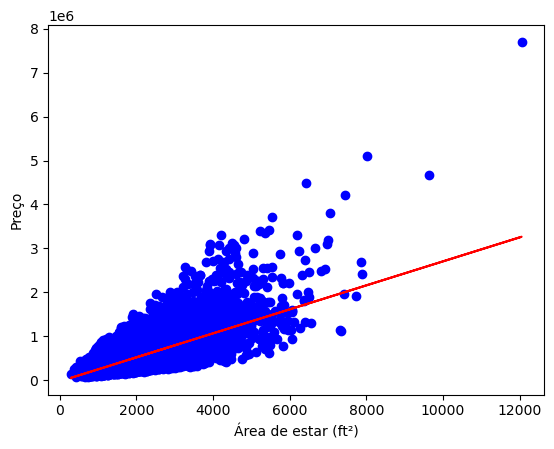

In [14]:
plt.scatter(feature1_treino, feature2_treino, color='blue')
plt.plot(feature1_treino, modelo.coef_[0][0]*feature1_treino + modelo.intercept_[0], '-r')
plt.xlabel("Área de estar (ft²)") # legenda para a feature de treino 1
plt.ylabel("Preço") # legenda para a feature de treino 2
plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [15]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoes_feature2 = modelo.predict(feature1_test)

# Vamos exibir a nossa reta de regressão no dataset de teste

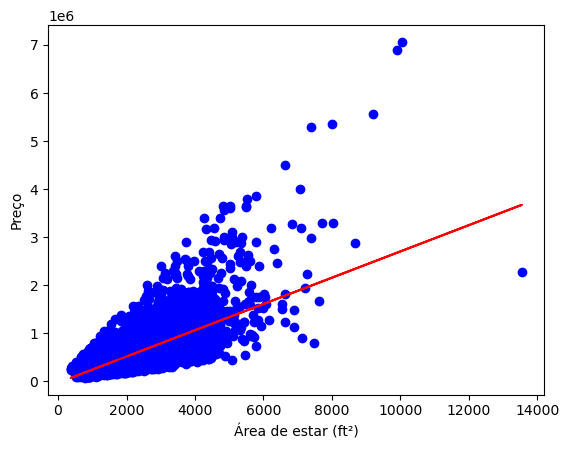

In [16]:
plt.scatter(feature1_test, feature2_teste, color='blue')
plt.plot(feature1_test, modelo.coef_[0][0]*feature1_test + modelo.intercept_[0], '-r')
plt.xlabel("Área de estar (ft²)") # legenda para a feature de teste 1
plt.ylabel("Preço") # legenda para a feature de teste 2
plt.show()

# Vamos avaliar o modelo

In [17]:
# Agora é mostrar as métricas
# print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoes_feature2 - feature2_teste)**2))
# print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(feature2_teste, predicoes_feature2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(feature2_teste, predicoes_feature2))
# print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(feature2_teste, predicoes_feature2)))

print("R2-score: %.2f" % r2_score(predicoes_feature2 , feature2_teste) )

Erro Médio Absoluto (MAE): 175091.75
R2-score: -0.15


# Responda:

1. Qual o tipo de correlação entre as features escolhidas (negativa, positiva ou nula)?	E explique o que isso significa com base nas suas features escolhidas.
2. Após realizar o treinamento três vezes como solicitado (test_size = 0.2, 0.3, 0.4), informe quais são os três valores obtidos para a sua métrica de desempenho definida.
3. Escreva a equação linear do estimador do modelo y = a + bx para cada momento.




# Respostas:

1.   O tipo de relação entre as features escolhidas é do tipo **positiva**. Com base nas *features* escolhidas, podemos observar que o **preço** (*price*) é dependente da **área de estar** (*sqft_living*).
2.   Os valores obtidos estão no [**quadro 1**](#quadro1).
3.   As equações correspondentes a cada momento estão no [**quadro 2**](#quadro2).

# Quadro 1<a name="quadro1"></a>
| Treino (%) | Erro Médio Absoluto (MAE) | R2-score |
|---|---|---|
| 20% | 177867.54 | -0.06 |
| 30% | 177803.05 | -0.09 |
| 40% | 175091.75 | -0.15 |69

# Quadro 2<a name="quadro2"></a>

| Treino (%) | Intercepto (A) | Inclinação (B) | Equação Linear do Estimador |
|---|---|---|---|
| 20% | -41999.18603994 | 279.55477932 | $ \Large \displaystyle ŷ = -41999.18603994 + 279.55477932 \cdot x$ |
| 30% | -41947.45401876 | 279.51011741 | $ \Large \displaystyle ŷ = -41947.45401876 + 279.51011741 \cdot x$ |
| 40% | -29687.20490389 | 273.3220643 | $ \Large \displaystyle ŷ = -29687.20490389 + 273.3220643 \cdot x$ |